In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import *
import numpy as np
%matplotlib inline

In [2]:
#importing full df

full_df = pd.read_csv("final_df.csv")
full_df

,name,developer,publisher,positive,negative,owners_approx,average_forever,median_forever,price,yt_views,yt_likes,yt_comments,score,is_successful
0,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,5382473,722938,75000000.0,30578,7329,0.00,20055366,426246,45340,81.0,1
1,Dota 2,Valve,Valve,1377514,267155,150000000.0,36994,1118,0.00,11063025,77961,22805,90.0,1
2,Grand Theft Auto V,Rockstar North,Rockstar Games,1064898,202052,35000000.0,13027,5973,14.80,79933514,1591274,326264,97.0,1
3,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1037820,844274,35000000.0,26778,11760,29.99,643933,3160,173,19.0,0
4,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,884943,128398,35000000.0,13964,2646,7.99,2716326,21901,902,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Battle Command,Ocean Software,Pixel Games UK,1,0,350000.0,0,0,4.99,5,0,0,1.0,0
4784,Dragon Hunters,Sigonheart Games LLC,Sigonheart Games LLC,1,0,150000.0,0,0,19.99,45829,344,23,1.0,0
4785,Minicraft Shooter,Sweet Games,Sweet Games,1,4,750000.0,0,0,0.99,423350,2227,63,75.0,1
4786,Squares,Jason Swisher,Jason Swisher,1,0,150000.0,0,0,0.99,632903,2807,186,1.0,0


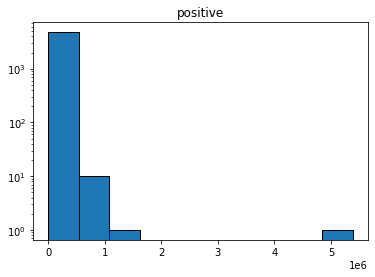

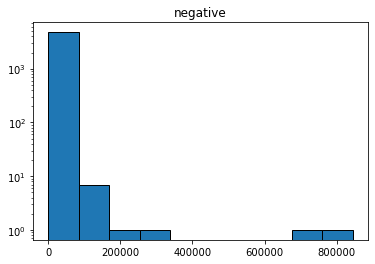

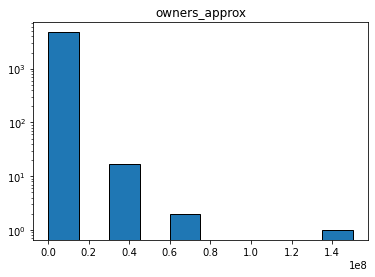

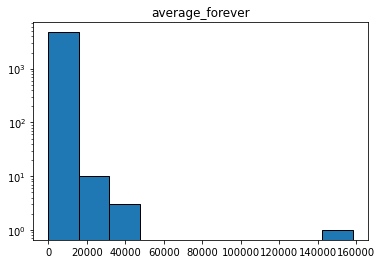

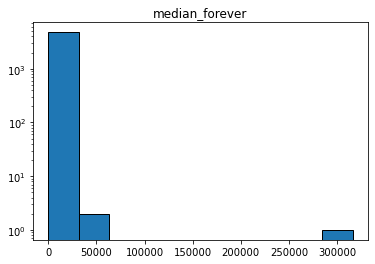

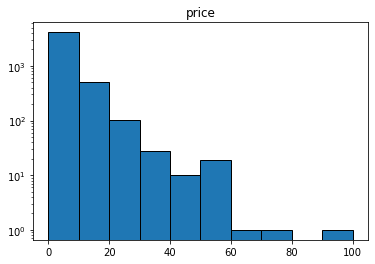

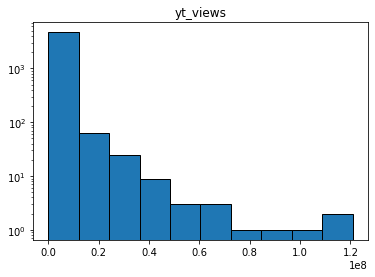

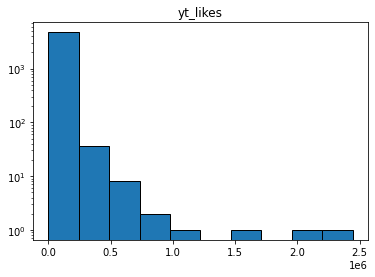

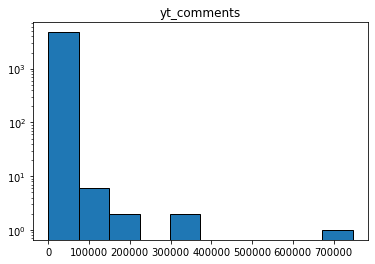

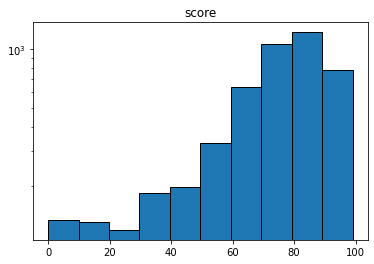

In [11]:
#visualization of numeric columns

numeric_cols = ['positive', 'negative', 'owners_approx', 'average_forever', 'median_forever', 'price', 'yt_views', 'yt_likes', 'yt_comments', 'score']

for item in numeric_cols:
    plt.figure()
    plt.hist(full_df[item], edgecolor='black')
    plt.title(item)
    plt.yscale("log")

correlation between score to all other columns: 

positive: 0.4531642346846224
negative: -0.041226672807006357
owners_approx: 0.14457045273834812
average_forever: 0.1760566895727479
median_forever: 0.13547845450768226
price: 0.21772583327130202
yt_views: 0.11403520748122924
yt_likes: 0.1915164049537274
yt_comments: 0.1495506607567485


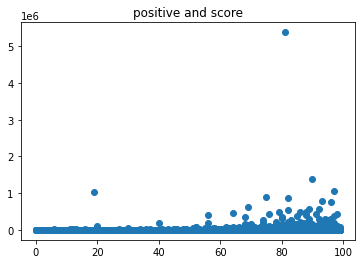

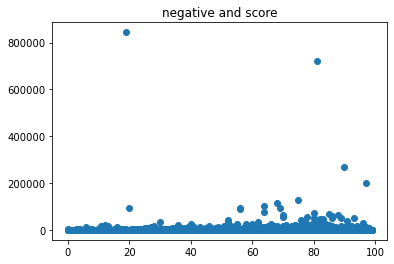

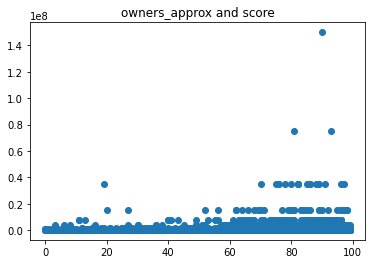

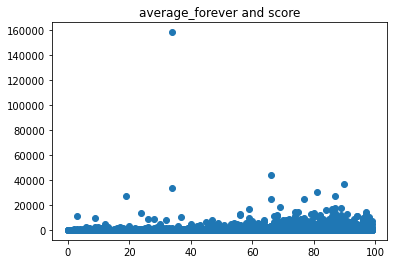

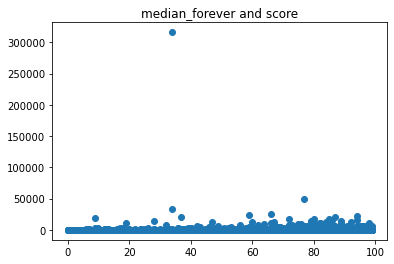

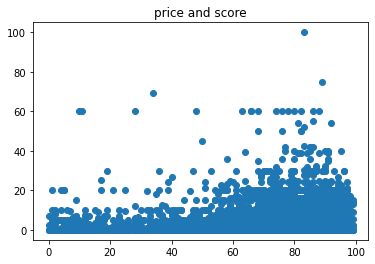

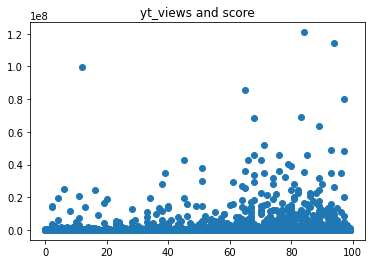

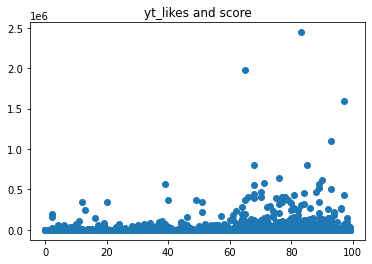

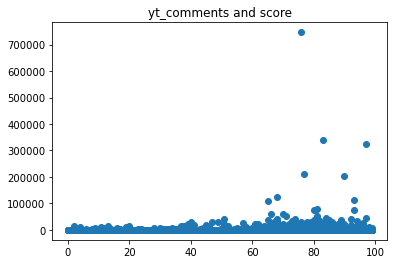

In [4]:
#correlations between score and the rest of the numeric columns + visualization using scatter plot 

numeric_cols_without_score = ['positive', 'negative', 'owners_approx', 'average_forever', 'median_forever', 'price', 'yt_views', 'yt_likes', 'yt_comments']
print("correlation between score to all other columns: \n")
for item in numeric_cols_without_score:
    print(item + ': ' + str(full_df['score'].corr(full_df[item], method="spearman")))
    plt.figure()
    plt.scatter(full_df['score'], full_df[item])
    plt.title(item + " and score")

array([[<AxesSubplot:xlabel='positive', ylabel='positive'>,
        <AxesSubplot:xlabel='negative', ylabel='positive'>,
        <AxesSubplot:xlabel='yt_views', ylabel='positive'>,
        <AxesSubplot:xlabel='yt_likes', ylabel='positive'>,
        <AxesSubplot:xlabel='yt_comments', ylabel='positive'>,
        <AxesSubplot:xlabel='score', ylabel='positive'>,
        <AxesSubplot:xlabel='is_successful', ylabel='positive'>],
       [<AxesSubplot:xlabel='positive', ylabel='negative'>,
        <AxesSubplot:xlabel='negative', ylabel='negative'>,
        <AxesSubplot:xlabel='yt_views', ylabel='negative'>,
        <AxesSubplot:xlabel='yt_likes', ylabel='negative'>,
        <AxesSubplot:xlabel='yt_comments', ylabel='negative'>,
        <AxesSubplot:xlabel='score', ylabel='negative'>,
        <AxesSubplot:xlabel='is_successful', ylabel='negative'>],
       [<AxesSubplot:xlabel='positive', ylabel='yt_views'>,
        <AxesSubplot:xlabel='negative', ylabel='yt_views'>,
        <AxesSubplot:xlabel=

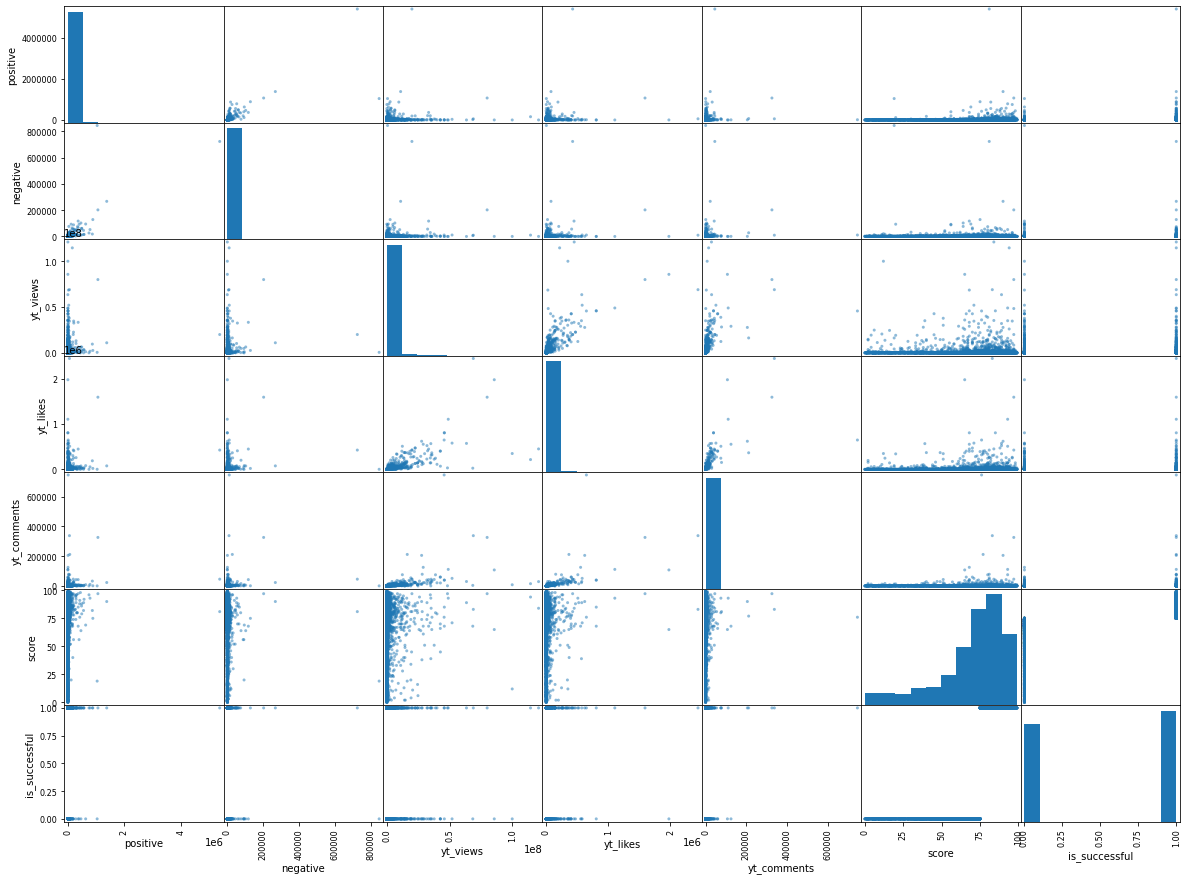

In [9]:
df_copy = full_df.copy()
df_copy.drop(columns=['name', 'developer', 'publisher', 'owners_approx', 'average_forever', 'median_forever', 'price'], inplace=True)

pd.plotting.scatter_matrix(df_copy, figsize=(20, 15))

# Statistical tests:
Test #1 - Our null hypothesis here is that there's no difference between the sample and the mean.  
Test #2 - Our null hypothesis here is that there is a significant difference between 2 samples from the same column.  
Test #3 - Our null hypothesis here is that there's no statistical difference between columns.

In [12]:
#--------------------------------------------------STATISTICAL TESTS-----------------------------------------------------------#

#statistical test 1 - ttest with 1 sample for each col for calculating P value and checking our null hypothesis.
#our null hypothesis here is that there's no difference between the sample and the mean.

rejected_list = []
failed_to_reject_list = []
for col in numeric_cols:
    col_mean = int(full_df[col].mean())
    data_sample = np.random.choice(full_df[col], 1200)
    ttest,p_value = ttest_1samp(data_sample, col_mean)
    if p_value < 0.05:
        rejected_list.append(col)
    else:
        failed_to_reject_list.append(col)

print("result of ttest 1 sample:")
print(rejected_list)
print(failed_to_reject_list)
print("---------------------------------------------------------------------------")

#statistical test 2 - ttest between 2 samples from each col.
#our null hypothesis here is that there is a significant difference between 2 samples from the same column

rejected_list.clear()
failed_to_reject_list.clear()
for col in numeric_cols:
    data_sample1 = np.random.choice(full_df[col], 1200)
    data_sample2 = np.random.choice(full_df[col], 1200)
    _,p_value = stats.ttest_rel(a=data_sample1, b=data_sample2)
    if p_value < 0.05:
        rejected_list.append(col)
    else:
        failed_to_reject_list.append(col)

print("result of ttest with 2 samples:")
print(rejected_list)
print(failed_to_reject_list)
print("---------------------------------------------------------------------------")

#statistical test 3 - ttest between 2 columns: Score and any other col. 
#Our null hypothesis here is that there's no statistical difference between columns.

numeric_cols.remove('score')
numeric_cols_without_score = numeric_cols
rejected_list.clear()
failed_to_reject_list.clear()

for col in numeric_cols_without_score:
    _,p_value = stats.ttest_ind(a=full_df[col], b=full_df['score'], equal_var=False)
    if p_value < 0.05:
        rejected_list.append(col)
    else:
        failed_to_reject_list.append(col)
        
print("result of ttest - score and other cols:")
print(rejected_list)
print(failed_to_reject_list)

result of ttest 1 sample:
['yt_comments']
['positive', 'negative', 'owners_approx', 'average_forever', 'median_forever', 'price', 'yt_views', 'yt_likes', 'score']
---------------------------------------------------------------------------
result of ttest with 2 samples:
['average_forever']
['positive', 'negative', 'owners_approx', 'median_forever', 'price', 'yt_views', 'yt_likes', 'yt_comments', 'score']
---------------------------------------------------------------------------
result of ttest - score and other cols:
['positive', 'negative', 'owners_approx', 'average_forever', 'median_forever', 'price', 'yt_views', 'yt_likes', 'yt_comments']
[]
